Import packages 

In [37]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

---

Import zipcodes

In [38]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


---

Import Turo data

In [47]:
turo = pd.read_excel(r'D:\Data Scraping\Turo\Nashville\Octorber\Clean Data\clean_data.xlsx')

turo.head()

,id,trips,average_rating,average_price,host_id,all_star_host,favorited_by_searcher,new_listing,make,model,type,year,city,lat,lng
0,301046,236,4.9116,43.585000,1311189,False,False,False,Toyota,Camry,CAR,2012,Nashville,36.089184,-86.920420
1,370101,6,5.0000,515.375000,5082554,False,False,False,Porsche,911,CAR,2014,Nashville,36.095788,-86.681452
2,386843,221,5.0000,91.000000,3293037,True,False,False,Jeep,Wrangler JK Unlimited,SUV,2018,Brentwood,36.024075,-86.748148
3,429041,102,5.0000,200.166667,4112200,True,False,False,Jaguar,F-TYPE,CAR,2018,Brentwood,36.042198,-86.767288
4,462620,53,4.9063,94.344000,5917679,True,False,False,Lexus,IS,CAR,2010,Nashville,36.190869,-86.811879


In [49]:
#create a geo data frame
turo_geo = gpd.GeoDataFrame(turo, 
                            crs = zipcodes.crs,
                            geometry = gpd.points_from_xy(turo.lng, turo.lat))
#view the type
type(turo_geo)

---

Combine bus stops and zipcodes with a spatial join

In [55]:
#subset the zipcodes df
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

#perform a spacial join
cars_by_zip = gpd.sjoin(turo_geo, zipcodes, predicate = 'within')

#view the head
cars_by_zip.head()

,id,trips,average_rating,average_price,host_id,all_star_host,favorited_by_searcher,new_listing,make,model,type,year,city,lat,lng,geometry,index_right,zip,po_name
0,301046,236,4.9116,43.585000,1311189,False,False,False,Toyota,Camry,CAR,2012,Nashville,36.089184,-86.920420,POINT (-86.92042 36.08918),7,37221,NASHVILLE
619,2006943,14,5.0000,42.397778,21327042,False,False,False,INFINITI,QX60,SUV,2015,Nashville,36.072703,-86.956972,POINT (-86.95697 36.07270),7,37221,NASHVILLE
788,2138403,7,5.0000,40.078889,2102980,False,False,False,Toyota,Prius,CAR,2013,Nashville,36.062538,-86.913928,POINT (-86.91393 36.06254),7,37221,NASHVILLE
923,2213114,0,NaN,46.017273,36122537,False,False,True,Dodge,Charger,CAR,2016,Nashville,36.082877,-86.918152,POINT (-86.91815 36.08288),7,37221,NASHVILLE
1,370101,6,5.0000,515.375000,5082554,False,False,False,Porsche,911,CAR,2014,Nashville,36.095788,-86.681452,POINT (-86.68145 36.09579),17,37217,NASHVILLE


In [56]:
cars_by_zip['zip'].value_counts()

zip
37214    153
37211     82
37013     80
37203     67
37217     59
37115     54
37210     44
37076     36
37209     31
37027     21
37206     20
37207     18
37208     15
37215     12
37204     10
37216     10
37212      8
37138      5
37218      4
37221      4
37205      4
37072      3
37189      3
37228      2
37220      1
37201      1
37219      1
Name: count, dtype: int64

---

Lets take a look at my zipcode 37210

In [61]:
cars_in_37210 = cars_by_zip.loc[cars_by_zip['zip'] == '37210']
cars_in_37210.shape

(44, 19)

In [62]:
polygon37210 = zipcodes.loc[zipcodes['zip'] == '37210']
polygon37210.shape

(1, 3)

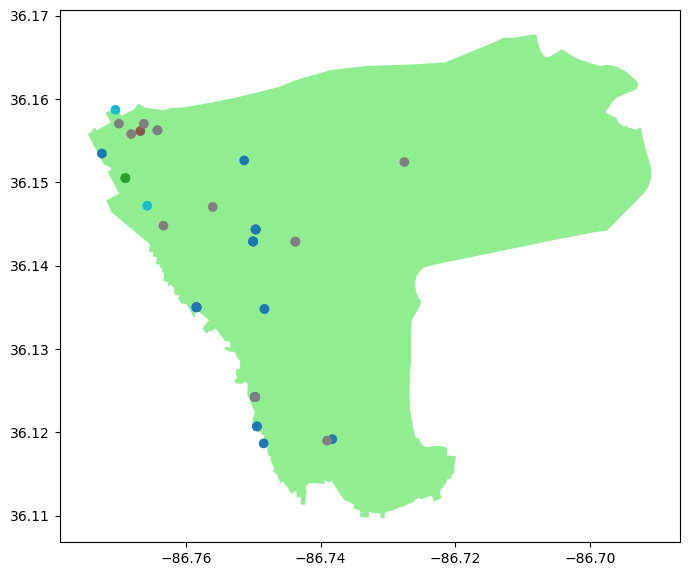

In [63]:
#fig, ax = matplotlib.subplots()
ax = polygon37210.plot(figsize = (8, 10), color = 'lightgreen')
cars_in_37210.plot(ax = ax, column = 'type');
plt.show();